# SPAM FILTER(AML)
# Name:Purnendu Ghosh
# Roll No: MDS201811


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import sklearn

In [4]:
import chardet

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
with open("D:\AML\smsspamcollection\SMSSpamCollection","rb") as f:
    result = chardet.detect(f.read())
print(result['encoding'])
df_raw = pd.read_csv("D:\AML\smsspamcollection\SMSSpamCollection",sep='\t',names=["v1","v2"],encoding=result['encoding'])

utf-8


In [7]:
df_raw.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df=df_raw[['v1','v2']].rename(columns={'v1':'label','v2':'sms'})

In [9]:
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
df.drop_duplicates(subset="sms",inplace=True)

In [12]:
df.describe()

,label,sms
count,5169,5169
unique,2,5169
top,ham,How much it will cost approx . Per month.
freq,4516,1


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df['sms']

In [15]:
y=df['label']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
print("Shape of X is {}".format(X.shape))
print("Shape of X_train is {} and shape of y_train is {}".format(X_train.shape, y_train.shape))
print("Shape of X_test is {} and shape of y_test is {}".format(X_test.shape, y_test.shape))

Shape of X is (5169,)
Shape of X_train is (3876,) and shape of y_train is (3876,)
Shape of X_test is (1293,) and shape of y_test is (1293,)


In [18]:
train_corpus = list(X_train)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer = TfidfVectorizer(max_features=5000)
vectorizer.fit(train_corpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=5000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Logistic Regression Model:
Logistic regression uses an equation as the representation, very much like linear regression.

Input values (x) are combined linearly using weights or coefficient values (referred to as the Greek capital letter Beta) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value.

Below is an example logistic regression equation:

y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x))

Where y is the predicted output, b0 is the bias or intercept term and b1 is the coefficient for the single input value (x). Each column in your input data has an associated b coefficient (a constant real value) that must be learned from your training data. 

In [22]:
##logistic regression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=60)
pipeline = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', logistic_regression)])

## Cross Validation Score

In [23]:
cv_score_logistic = cross_val_score(pipeline, X_train, y_train, cv=5)
print("The cross validation score for Logistic Regression is:")
print(cv_score_logistic)

The cross validation score for Logistic Regression is:
[0.96005155 0.96262887 0.95870968 0.96645161 0.96124031]


In [24]:
def set_binary_labels(label):
    if label == 'ham':
        return 1
    else:
        return 0

Accuracy:  0.9675174013921114
Precision:  0.9663793103448276
Recall:  0.9973309608540926
F1 score:  0.9816112084063049
The precision recall curve


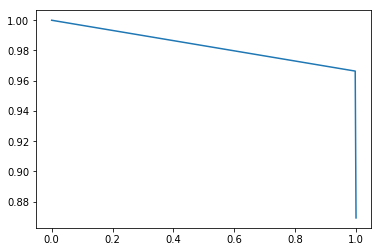

In [25]:
#Accuracy and Precision
#Note convert the labels to binary labels to use precision and recall
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import precision_recall_curve

pipeline.fit(X_train, y_train)
y_predicted = pipeline.predict(X_test)

y_bin_true = [set_binary_labels(label) for label in list(y_test)] 
y_bin_predict = [set_binary_labels(label) for label in list(y_predicted)]

accuracy = accuracy_score(y_test, y_predicted)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_bin_true, y_bin_predict, average='binary')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(y_bin_true, y_bin_predict)
plt.plot(recall, precision)

## Naive Bayes Model:
Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. 

In machine learning, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

In [26]:
#Model 2: Naive Bayes
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
pipeline_bayes = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', naive_bayes)])

In [27]:
#Cross Validation Score
cv_score_naive_bayes = cross_val_score(pipeline_bayes, X_train, y_train, cv=5).mean()
print("The cross validation score for Naive Bayes is:")
print(cv_score_naive_bayes)

The cross validation score for Naive Bayes is:
0.947108374172581


Accuracy:  0.9590100541376644
Precision:  0.9549702633814783
Recall:  1.0
F1 score:  0.9769665362885701
The precision recall curve


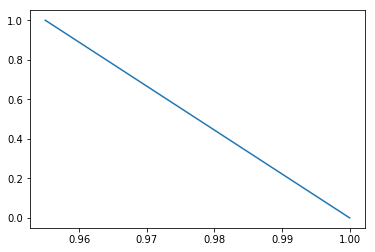

In [28]:
#Accuracy and Precision
#Note convert the labels to binary labels to use precision and recall

pipeline_bayes.fit(X_train, y_train)
y_predicted = pipeline_bayes.predict(X_test)

y_bin_true = [set_binary_labels(label) for label in list(y_test)] 
y_bin_predict = [set_binary_labels(label) for label in list(y_predicted)]

accuracy = accuracy_score(y_test, y_predicted)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_bin_true, y_bin_predict, average='binary')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(y_bin_true, y_bin_predict)
plt.plot(precision, recall)

In [29]:
#Model 3: Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
pipeline_decision_tree = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', decision_tree)])

In [30]:
#Cross Validation Score
cv_score_decision_tree = cross_val_score(pipeline_decision_tree, X_train, y_train, cv=5)
print("The cross validation score for Decison Tree is:")
print(cv_score_decision_tree)

The cross validation score for Decison Tree is:
[0.95747423 0.95618557 0.96258065 0.95870968 0.95348837]


Accuracy:  0.9450889404485692
Precision:  0.9630606860158312
Recall:  0.9741992882562278
F1 score:  0.9685979655019902
The precision recall curve


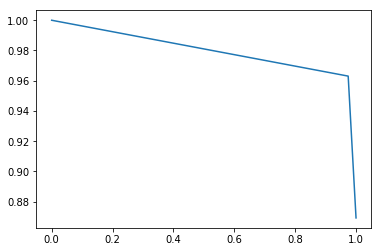

In [31]:
#Accuracy and Precision
#Note convert the labels to binary labels to use precision and recall

pipeline_decision_tree.fit(X_train, y_train)
y_predicted = pipeline_decision_tree.predict(X_test)

y_bin_true = [set_binary_labels(label) for label in list(y_test)] 
y_bin_predict = [set_binary_labels(label) for label in list(y_predicted)]

accuracy = accuracy_score(y_test, y_predicted)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_bin_true, y_bin_predict, average='binary')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

print("The precision recall curve")
precision, recall, _ = precision_recall_curve(y_bin_true, y_bin_predict)
plt.plot(recall, precision)

In [32]:
#Model 4:Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
pipeline_forest = Pipeline([('vectorizer', TfidfVectorizer()),
                     ('classifier', random_forest)])

In [33]:
#Cross Validation Score
cv_score_random_forest = cross_val_score(pipeline_forest, X_train, y_train, cv=5)
print("The cross validation score for Random Forest is:")
print(cv_score_random_forest)

The cross validation score for Random Forest is:
[0.97164948 0.96262887 0.96774194 0.96516129 0.96640827]


Accuracy:  0.9651972157772621
Precision:  0.9638865004299226
Recall:  0.9973309608540926
F1 score:  0.9803235679930039
The precision recall curve is:


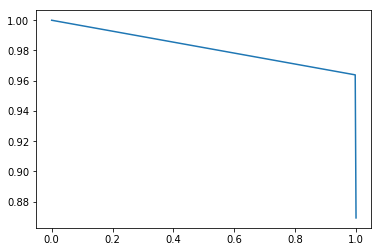

In [34]:
#Accuracy and Precision
#Note convert the labels to binary labels to use precision and recall

pipeline_forest.fit(X_train, y_train)
y_predicted = pipeline_forest.predict(X_test)

y_bin_true = [set_binary_labels(label) for label in list(y_test)] 
y_bin_predict = [set_binary_labels(label) for label in list(y_predicted)]

accuracy = accuracy_score(y_test, y_predicted)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_bin_true, y_bin_predict, average='binary')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

print("The precision recall curve is:")
precision, recall, _ = precision_recall_curve(y_bin_true, y_bin_predict)
plt.plot(recall, precision)

In [35]:
#model 5:svm
from sklearn.svm import SVC
support_vector=SVC(random_state=42)
pipeline_svc=Pipeline([('vectorizer',TfidfVectorizer()),('classifier',support_vector)])


In [36]:
#cross validation score
cv_score_svm = cross_val_score(pipeline_svc, X_train, y_train, cv=5)
print("The cross validation score for Random Forest is:")
print(cv_score_svm)


The cross validation score for Random Forest is:
[0.875      0.875      0.87483871 0.87483871 0.87596899]


Accuracy:  0.8692962103634957
Precision:  0.8692962103634957
Recall:  1.0
F1 score:  0.9300786098469176
The precision recall curve is:


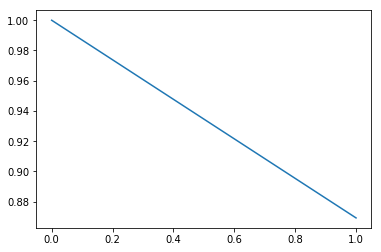

In [37]:
#Accuracy and Precision
#Note convert the labels to binary labels to use precision and recall

pipeline_svc.fit(X_train, y_train)
y_predicted = pipeline_svc.predict(X_test)

y_bin_true = [set_binary_labels(label) for label in list(y_test)] 
y_bin_predict = [set_binary_labels(label) for label in list(y_predicted)]

accuracy = accuracy_score(y_test, y_predicted)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_bin_true, y_bin_predict, average='binary')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1_score)

print("The precision recall curve is:")
precision, recall, _ = precision_recall_curve(y_bin_true, y_bin_predict)
plt.plot(recall, precision)